# NBA Player Project #

I am using a dataset from Kaggle that consists of all NBA player season data from last 25 years. It contains various traditional statistics (including games played, points per game, rebounds per game and assists per game as well as more advanced statistics, such as net rating, rebound rate and others. 
The dataset can be found here: https://www.kaggle.com/datasets/justinas/nba-players-data/data.
My goal is to see if I can use an unsupervised clustering method to gain insights into what makes players similar. And then see if similar players were drafted at similar points in the NBA Draft (in which the players projected to be best are taken higher).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import os
os.chdir('/Users/williamtruelove')

In [3]:
data = pd.read_csv('DataSets/all_seasons.csv')

### Exploratory Analysis ###

In [4]:
data.head()

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 22 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [7]:
data.describe()

Unnamed: 0           age  player_height  player_weight            gp  \
count  12844.000000  12844.000000   12844.000000   12844.000000  12844.000000   
mean    6421.500000     27.045313     200.555097     100.263279     51.154158   
std     3707.887763      4.339211       9.111090      12.426628     25.084904   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     3210.750000     24.000000     193.040000      90.718400     31.000000   
50%     6421.500000     26.000000     200.660000      99.790240     57.000000   
75%     9632.250000     30.000000     208.280000     108.862080     73.000000   
max    12843.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       8.212582      3.558486      1.824681     -2.226339      0.054073   
std        6.016573      2.477885      1.800840     12.665124      0.043335   
min        0.000000      0.000000      0.000000   -250.000000      0.000000   
25%        3.600000      1.800000      0.600000     -6.400000      0.021000   
50%        6.700000      3.000000      1.200000     -1.300000      0.040000   
75%       11.500000      4.700000      2.400000      3.200000      0.083000   
max       36.100000     16.300000     11.700000    300.000000      1.000000   

           dreb_pct       usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  12844.000000  
mean       0.140646      0.184641      0.513138      0.131595  
std        0.062513      0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.096000      0.149000      0.482000      0.066000  
50%        0.130500      0.181000      0.525000      0.103000  
75%        0.179000      0.217000      0.563000      0.179000  
max        1.000000      1.000000      1.500000      1.000000

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

The data set has no duplicate rows and no missing values. 
Because we are going to be trying to group players based on their draft position, we need to make some changes to the data frame. So I will split players into 7 groups: Picks 1-15, 16-30, 30-45 etc until Undrafted. 

In [10]:
data['draft_number']

0               42
1               34
2               12
3                7
4               22
           ...    
12839            3
12840    Undrafted
12841           19
12842           58
12843    Undrafted
Name: draft_number, Length: 12844, dtype: object

In [11]:
def map_draft_position(draft_number):
    if draft_number == 'Undrafted':
        return 'Undrafted'
    draft_number = int(draft_number)  # Convert to integer
    if draft_number <= 15:
        return '1-15'
    elif draft_number <= 30:
        return '16-30'
    elif draft_number <= 45:
        return '31-45'
    else:
        return '46-60'

In [12]:
data['draft_position'] = data['draft_number'].apply(map_draft_position)

Text(0, 0.5, 'Frequency')

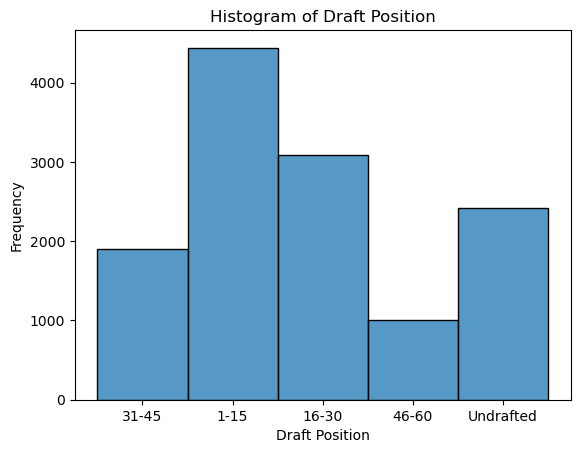

In [66]:

sns.histplot(data['draft_position'])
plt.title('Histogram of Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('Frequency')

We see that the draft position is not normally distributed. There is decreasing number of player seasons as they are drafted later in the draft, though there are many seasons by players that are undrafted. This is what we would expect as the most talented players are highly drafted and then play more seasons in the NBA. The reason there are so many undrafted seasons is simply because there are more players undrafted that get a chance to play in the NBA than there are in each drafted bin.

#### Histograms of the Numeric Factors ####

In [15]:
numeric= ['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct',
               'usg_pct', 'ts_pct', 'ast_pct']

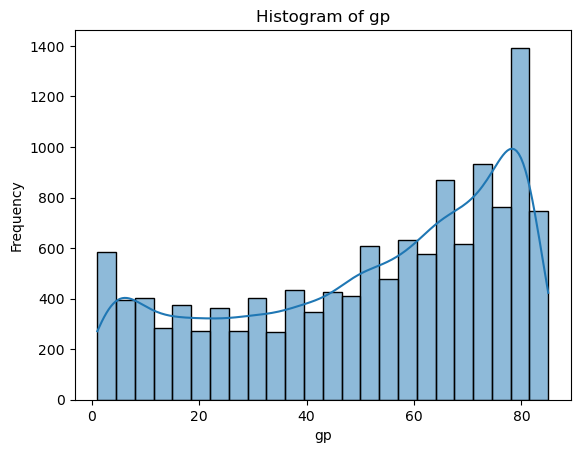

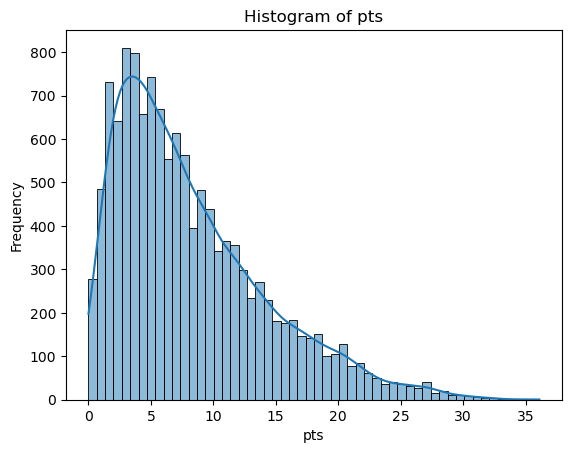

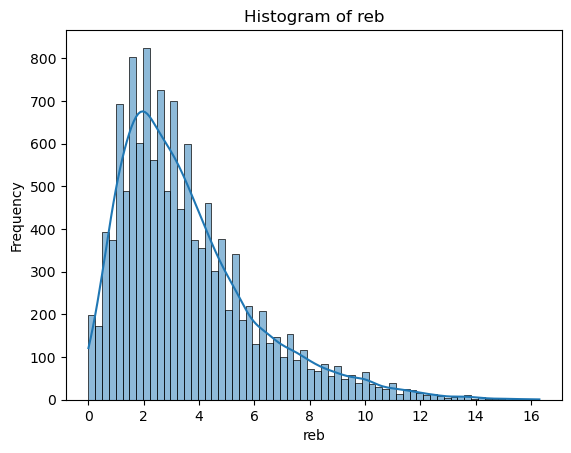

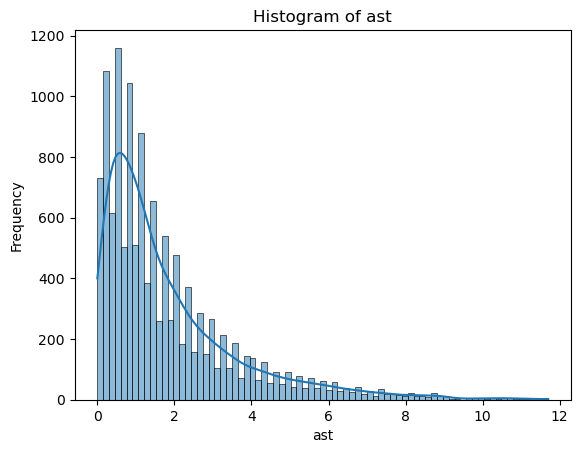

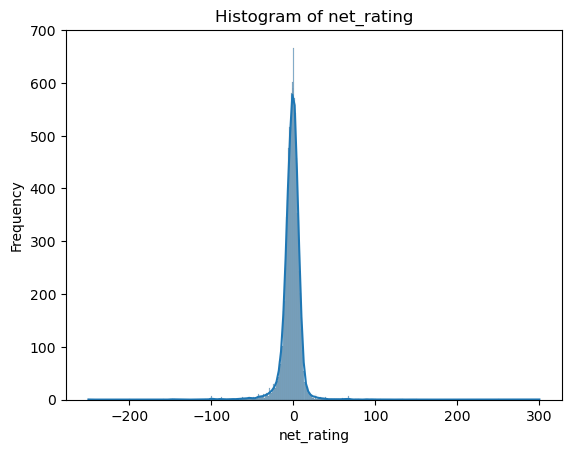

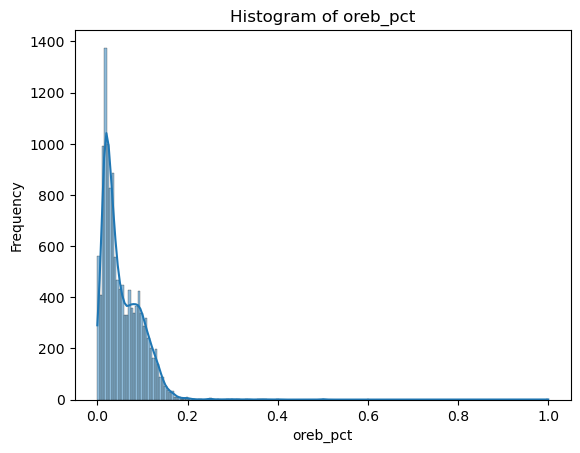

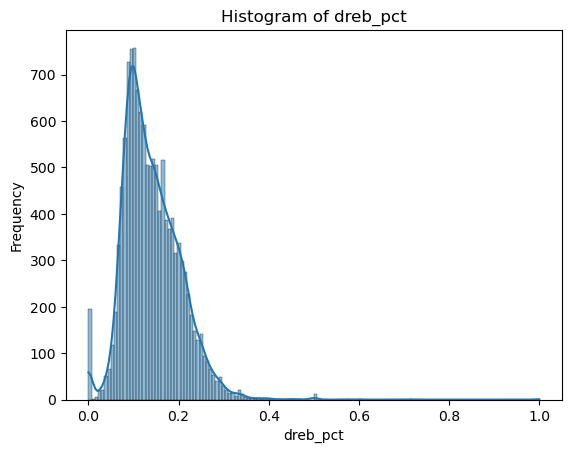

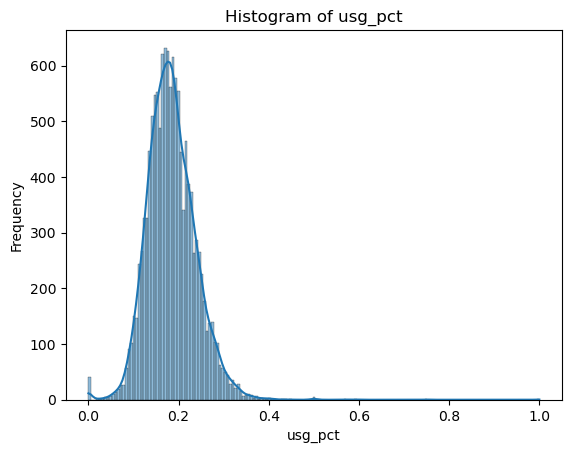

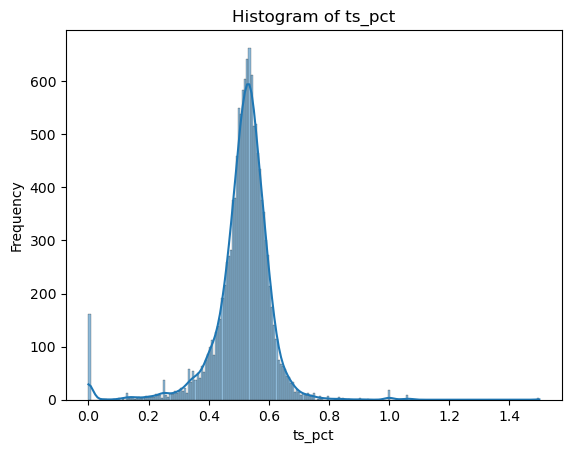

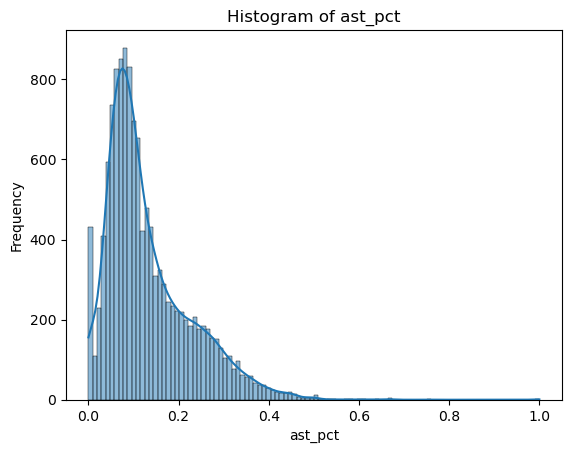

In [67]:
data_subset = data[numeric]
for col in data_subset.columns:
    sns.histplot(data_subset[col], kde=True) 
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

We see that there is a different range from the rate statistics as there is for the per-game statistics. For this reason, I will scale all of the factors. This will ensure that our models do not overfit towards on factor. 

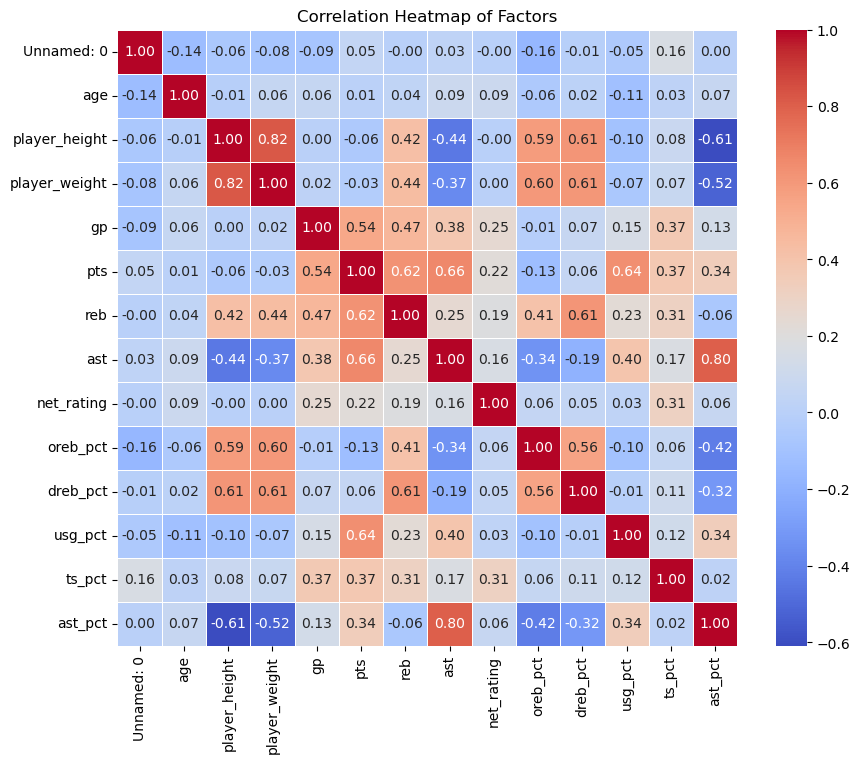

In [68]:
corr = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Factors')

# Show the plot
plt.show()

Very clearly, many of our variables are correlated. So, to deal with these collinearities, and to simplify the dataset, I will run a Principal Component Analysis.  

## Models ##

In [18]:
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(data[numeric]) #scale the data. Using only the performance, and not the biographical, stats as factors

#### PCA ####

When we perform PCA, we will do it with a few intentions: one is to deal with the many collinearities in our dataset, and the other is to simplify our data. In order to simplify the data enough to visualize it, we will begin with only 2 PCA components.

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled) 


In [71]:
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data[numeric].columns)

print(loading_df)

                 PC1       PC2
gp         -0.356455  0.142525
pts        -0.500278  0.053334
reb        -0.319671  0.442880
ast        -0.447129 -0.243113
net_rating -0.187786  0.119230
oreb_pct    0.093902  0.498684
dreb_pct   -0.019239  0.516397
usg_pct    -0.335298 -0.067405
ts_pct     -0.258551  0.186793
ast_pct    -0.311165 -0.390630


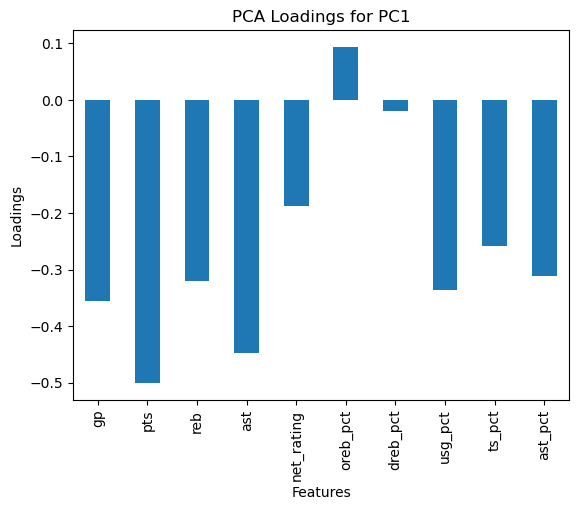

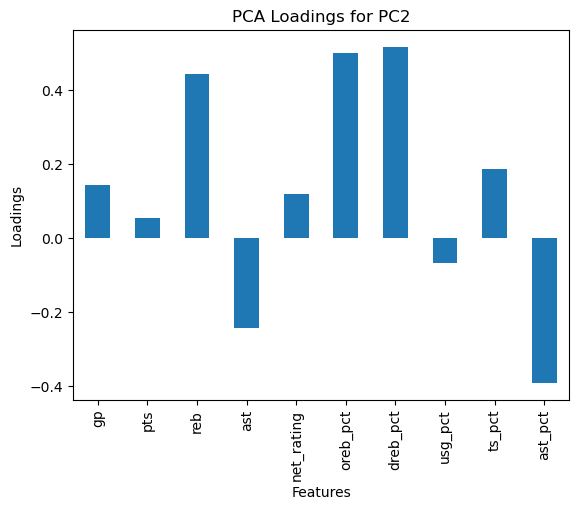

In [24]:
loading_df['PC1'].plot(kind='bar')
plt.title('PCA Loadings for PC1')
plt.ylabel('Loadings')
plt.xlabel('Features')
plt.show()


loading_df['PC2'].plot(kind='bar')
plt.title('PCA Loadings for PC2')
plt.ylabel('Loadings')
plt.xlabel('Features')
plt.show()

Here we see the PCA loadings. While each principal component represents the linear combinations of the factors, the loadings represent the coefficients of these linear combinations. This is instructive, because it shows us which factors combine to dictate which players are most similar to each other. In the first principal component, we can see that points, rebounds and assist averages all contribute togther towards the variance in this component. the "rate" statistics less so, and the offesnive rebound and defensive rebound percents contribute in the opposite direction. The second principal component capture the player seasons with high levels of rebounds, and balances them against the player seasons with many assists.  

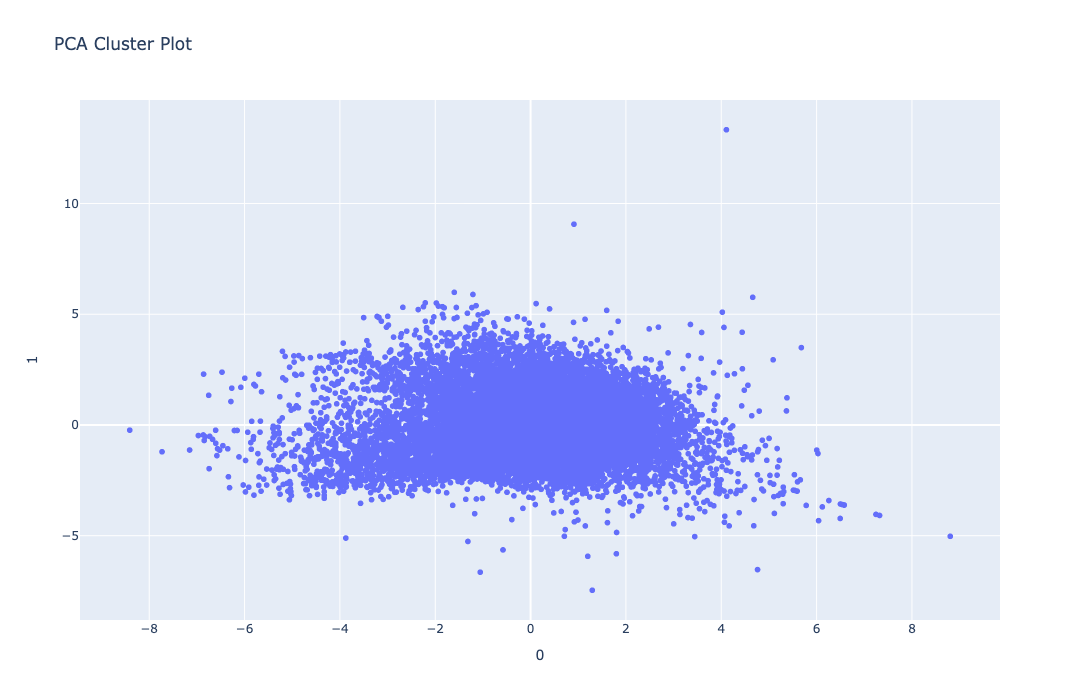

In [73]:
px.scatter(X_pca, x=0, y=1, title='PCA Cluster Plot', height = 700)

In the above scatter plot we can see every player is represented by a point. Now, let's run a cluster analysis and see how the players are grouped with an unsupervised method. 

### Clustering ###

First we need to decide how many clusters do use. To determine this we will use the "Elbow Method". We are plotting the inertia against the number of clusters. We want to pick a spot at an "elbow" where the amount of inertia loss is diminishing, indicating diminishing returns of using more clusters. Based on this chart, we will set the number of clusters at 5. 

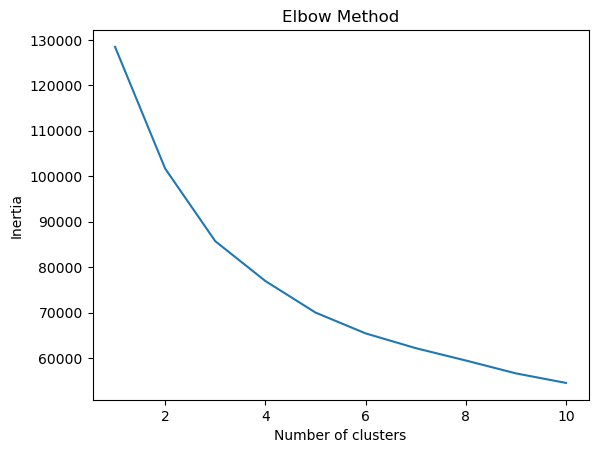

In [75]:
import matplotlib.pyplot as plt


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 'auto')
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [82]:
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [83]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_pca)

df_x_pca = pd.DataFrame(X_pca)
df_x_pca['player_name'] = data['player_name']
df_x_pca['net_rating'] = data['net_rating']
df_x_pca['labels'] = labels
df_x_pca

0         1       player_name  net_rating  labels
0      0.036338 -1.612524  Randy Livingston         0.3       2
1      1.899344 -0.570806  Gaylon Nickerson         8.9       0
2      0.024236  1.385959      George Lynch        -8.2       1
3     -0.408709 -0.563133    George McCloud        -2.7       2
4      1.519472  0.747708      George Zidek       -14.1       1
...         ...       ...               ...         ...     ...
12839 -5.772153  1.760936       Joel Embiid         8.8       3
12840  2.719034 -1.595188   John Butler Jr.       -16.1       0
12841 -0.832075  1.388652      John Collins        -0.2       4
12842  1.065929  2.303568      Jericho Sims        -6.7       1
12843  0.318932  1.091988    JaMychal Green        -8.2       1

[12844 rows x 5 columns]

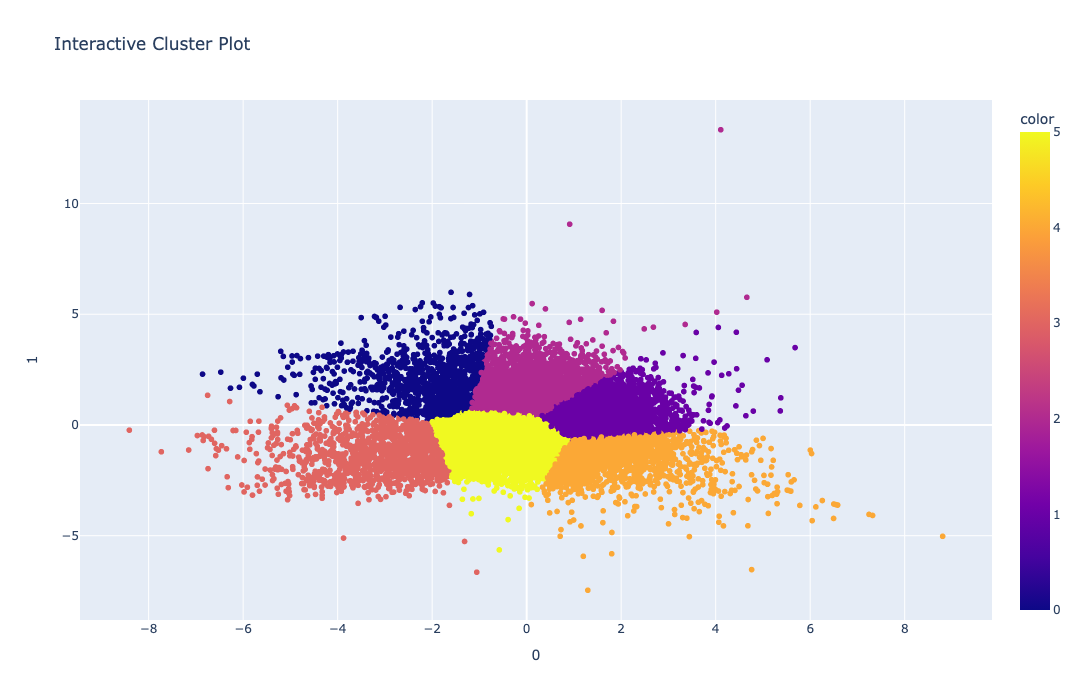

In [81]:
fig = px.scatter(df_x_pca, x=0, y=1, color=labels, 
                 hover_data=['player_name', 'net_rating'], title='Interactive Cluster Plot', height = 700)
fig

Looking at the plot and using the interactive hover features and domain knowledge, we can get an idea of how the player seasons are clustered. For example, group 3, and specicifically those on the far left of group 3 are the superstars: Lebron James, Russell Westrbook. This group also contains mostly high to medium achieving guards. The players in group zero consists of some super star seasons, but more center/forward type players (tall ones). Interestingly, the truly great all-around players (Nikola Jokic for example) have seasons in both of these clusters. As you move to the right of the plot, group 5 is comprise mostly of solid guards, group 2 of solid forward/centers, then groups 4 and 1 are comprised of very borderline NBA players. Overall, it seems the model grouped players well based on the quality and type of contributions to basketball games. 

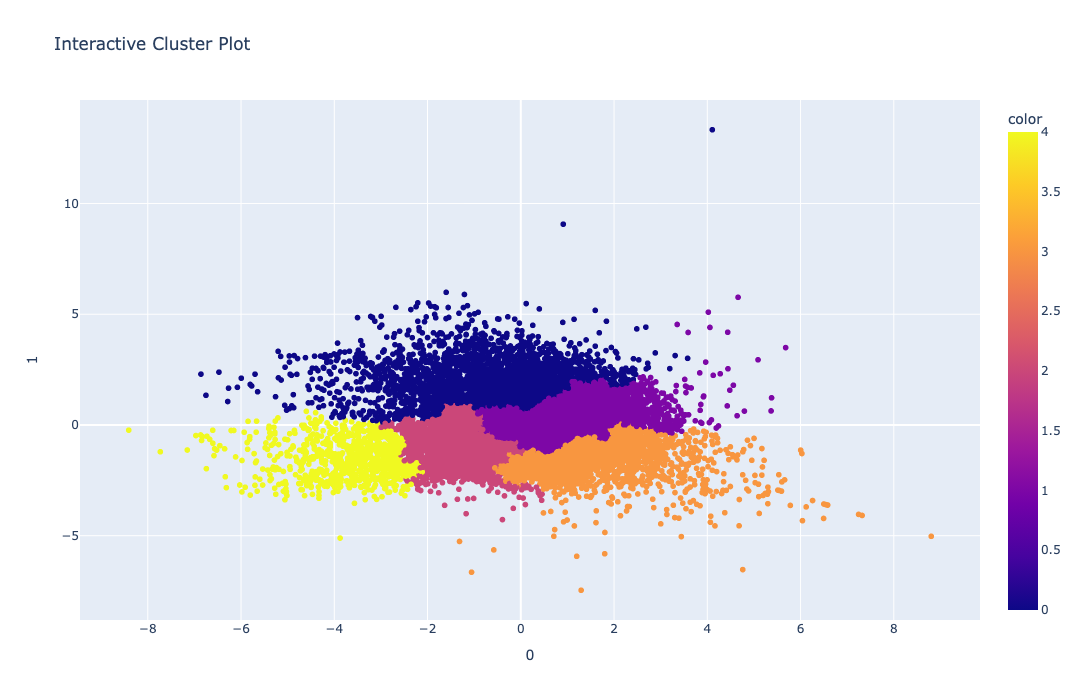

In [84]:
agglom_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward').fit(X_pca)
labels_2 = agglom_model.labels_
df_x_pca = pd.DataFrame(X_pca)
df_x_pca['player_name'] = data['player_name']
df_x_pca['labels'] = labels_2
fig = px.scatter(df_x_pca, x=0, y=1, color=labels_2, 
                 hover_data=['player_name'], title='Interactive Cluster Plot', height = 700)
fig

Using a hierarchal model, there was a similar result, although it grouped many more seasons in the high achieving center/forward group. 

#### Can the clusters predict when the player was drafted? ####

At first, we used only two components in our principal component analysis. We did this so it would be easy to visualize the data. Now, we would like to run a prediction, so we will try to be more exact with our choice. Looking at the graph below, we see want to choose the number of components where the amount of cumulative explained variance starts to slow, indicating diminishing returns of introducing more components. In this case, it seems to be at 5 components. 

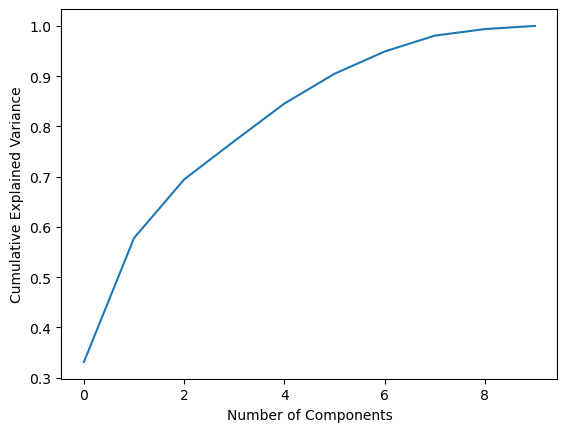

In [52]:
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [113]:
train, test = train_test_split(data, test_size=0.2, random_state=42) #split data into training and testing sets
x_train = train[numeric]
x_test = test[numeric]
y_train = train['draft_position']
y_test = test['draft_position']

In [114]:
import itertools

def label_permute_compare(ytdf,yp,n=5): #function adapted from homework to assign label order
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
# your code here
    order = ['1-15','16-30', '31-45', '46-60', 'Undrafted']
    perms = list(itertools.permutations(order))
    acc = 0
    max_acc_list = []
    
    for perm in perms:
        count = 0
        j = 0
        for i in ytdf.index.tolist():
            if perm[yp[j]] == ytdf[i]:
                count += 1
                j += 1
        temp = count / len(yp)
        if temp > acc:
            acc = temp
            max_acc_list = perm
    return max_acc_list, acc

In [115]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
pca_5 = PCA(n_components = 5)
x_train_pca = pca_5.fit_transform(x_train_scaled)
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(x_train_pca)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [116]:
max_acc_list, acc = label_permute_compare(y_train, labels)
max_acc_list


('31-45', '1-15', '46-60', 'Undrafted', '16-30')

In [93]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_pca = pca_5.fit_transform(x_test_scaled)
y_pred = kmeans.predict(x_test_pca)

In [117]:
mapping = {3: 'Undrafted', 1: '1-15', 2: '46-60', 4: '16-30', 0: '31-45'}
y_pred_replaced = np.array([mapping[val] for val in y_pred])

In [118]:
accuracy = accuracy_score(y_test, y_pred_replaced)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_replaced))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_replaced))

Accuracy: 0.1841183339820942
Classification Report:
              precision    recall  f1-score   support

        1-15       0.25      0.24      0.24       879
       16-30       0.26      0.19      0.22       610
       31-45       0.17      0.27      0.21       358
       46-60       0.15      0.20      0.17       220
   Undrafted       0.02      0.02      0.02       502

    accuracy                           0.18      2569
   macro avg       0.17      0.18      0.17      2569
weighted avg       0.19      0.18      0.18      2569

Confusion Matrix:
[[208 209 167  37 258]
 [215 113 120  48 114]
 [121  41  96  48  52]
 [ 88  21  50  45  16]
 [189  48 124 130  11]]


The results of the model show that the clustering does not help predict when in the draft players were drafted. While it did well in clustering players that domain knowledge says were similar, the attributes it clustered on did not help predict when a player was drafted. 

### SVP Model ###

In [119]:
x_scaled = scaler.fit_transform(data[numeric])
X = x_scaled
y = data['draft_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC()

In [121]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4122989102231448
Classification Report:
              precision    recall  f1-score   support

        1-15       0.48      0.76      0.59      1299
       16-30       0.30      0.25      0.28       924
       31-45       0.00      0.00      0.00       576
       46-60       0.00      0.00      0.00       325
   Undrafted       0.36      0.51      0.42       730

    accuracy                           0.41      3854
   macro avg       0.23      0.30      0.26      3854
weighted avg       0.30      0.41      0.34      3854

Confusion Matrix:
[[986 171   0   0 142]
 [499 232   2   0 191]
 [257 127   0   0 192]
 [108  70   0   0 147]
 [194 162   3   0 371]]


/Users/williamtruelove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/williamtruelove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/williamtruelove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [122]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


SVC(C=1, gamma=1)

In [123]:
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4078879086663207
Classification Report:
              precision    recall  f1-score   support

        1-15       0.50      0.70      0.58      1299
       16-30       0.31      0.29      0.30       924
       31-45       0.24      0.08      0.12       576
       46-60       0.20      0.00      0.01       325
   Undrafted       0.36      0.48      0.41       730

    accuracy                           0.41      3854
   macro avg       0.32      0.31      0.28      3854
weighted avg       0.36      0.41      0.36      3854

Confusion Matrix:
[[906 226  35   0 132]
 [426 268  42   1 187]
 [229 131  44   2 170]
 [ 91  76  17   1 140]
 [172 157  47   1 353]]


The SVP supervised learning model did a much better job of predicting when players were drafted, though not well enough to draw any significant conclusions. 

### Conclusion ###

In this project we looked at statistics from every player season since 1996. Using PCA as adimensionality reduction technique, we were able to visualize all of those seasons and then cluster them with a k-means algorithm as well as a hierarchal algorithm. We were able to see which player seasons were most similar based on the statistics from the data set. Trying to use this unsupervised method to predict draft position was not successful, however the SVM supervised machine learning method was more successful, though still probably not overly useful. Moving forward, I would like to try to use career statistics rather than single season. This would give a better idea of the true value of a player and most likely be more predictive of when they were drafted.